In [3]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import measure
import tensorflow as tf
import keras
from keras import layers

import generator
from explainabilityModels import make_gradcam_heatmap as GradCam

In [4]:
N = 4000
size = 64
labels = np.random.randint(2, size = N)
imgs = np.zeros((size, size, N))


In [5]:
#fill array with corresponding images
for i in range(N):
    if labels[i] == 0:
        x = generator.generate_blob_img(length=size, big = True, big_blob_size=8, big_blob_range=2)
    elif labels[i] == 1:
        x = generator.generate_blob_img(length=size, big = False)
    imgs[:,:,i] = x

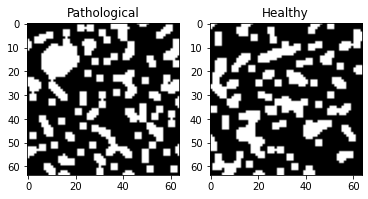

In [6]:
#display one pathological and one healthy image
fig, ax = plt.subplots(1,2)

path_img = imgs[:,:,np.where(labels == 0)[0][0]]
healthy_img = imgs[:,:,np.where(labels ==1)[0][0]]

ax[0].imshow(path_img, cmap=plt.cm.gray)
ax[1].imshow(healthy_img, cmap=plt.cm.gray)

ax[0].set_title("Pathological");
ax[1].set_title("Healthy");

In [14]:
img = measure.label(path_img)
img2 = measure.label(healthy_img)


(64, 64)

In [8]:
img = measure.regionprops_table(img, properties=('area', 'eccentricity', 'extent', ))
img2 = measure.regionprops_table(img2, properties=('area', 'eccentricity', 'extent', ))

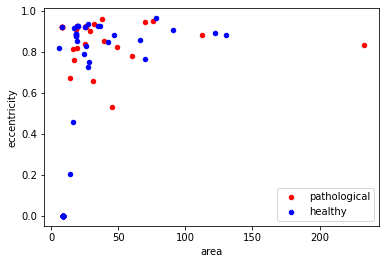

In [9]:
regionprops = pd.DataFrame(img)
regionprops2 = pd.DataFrame(img2)
ax1 = regionprops.plot(kind='scatter', x = 'area', y = 'eccentricity', color = 'r', label = 'pathological')
ax2 = regionprops2.plot(kind='scatter', x = 'area', y = 'eccentricity', color = 'b', label = 'healthy', ax = ax1)



In [44]:
#make gradcam heatmap for every image and normalise
heatmaps = np.zeros_like(imgs)
model = tf.keras.models.load_model("models/model20/")

for img in range(N):
    heatmaps[:,:,img] = GradCam(imgs[:,:,img], model, -5, 0)
    heatmaps[:,:,img] /= heatmaps[:,:,img].sum()


In [15]:
#get segmentation for every image
region_imgs = np.zeros_like(imgs)

for img in range(N):
    region_imgs[:,:,img] = measure.label(imgs[:,:,img])

In [51]:
#generate interpretability scores for each blob; score is the sum of intensities of heatmap in the region
np.unique(region_imgs[:,:,0]).shape[0]



51